In [12]:
import numpy as np #NumPy is a general-purpose array-processing package.
import pandas as pd #It contains high-level data structures and manipulation tools designed to make data analysis fast and easy.
import matplotlib.pyplot as plt #It is a Plotting Library
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [13]:
from mlxtend.frequent_patterns import apriori, association_rules

In [14]:
#zomato = pd.read_excel('C:/Users/shubhhh/Downloads/Zomato_Dev.xlsb', engine='pyxlsb')
zomato=pd.read_csv('zomato.csv')

# CODE CLEANUP

In [15]:
zomato=zomato.drop(['url','phone'],axis=1) 

In [16]:
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)

In [17]:
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})

In [18]:
zomato['cost'] = zomato['cost'].astype(str)
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',',''))
zomato['cost'] = zomato['cost'].astype(float)

In [19]:
zomato['rate'].unique()
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

In [20]:
#Create a copy for apriori
zomatoCopy = zomato

In [21]:
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())
zomato_en

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,4,600.0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23254,1747,1492,0,0,3.8,128,49,33,1797,856,1200.0,2469,0,6,29
23255,1492,1316,1,1,3.9,77,49,58,55,161,2000.0,2201,0,6,29
23256,1499,1318,1,1,2.8,161,49,15,1569,777,1200.0,2203,0,6,29
23257,4378,846,1,1,2.5,81,49,15,5193,503,800.0,14055,0,6,29


In [22]:
dish1= zomato["dish_liked"].str.split(",", n = 3, expand = True) 
zomato['Dish-1']=dish1[0]
zomato['Dish-2']=dish1[1]
zomato['Dish-3']=dish1[2]

In [23]:
cuisine1=zomato["cuisines"].str.split(",", n = 3, expand = True) 
zomato['Cuisine-1']=cuisine1[0]
zomato['Cuisine-2']=cuisine1[1]
zomato['Cuisine-3']=cuisine1[2]

In [24]:
zomato=zomato.drop(['address','reviews_list','dish_liked','cuisines'],axis=1)

In [25]:
li=zomato["rest_type"].str.split(",", n = 3, expand = True)
zomato["rest_type_unique"] = li[0]

In [26]:
zomato["rest_type_unique"].replace({"Beverage Shop": "Bar", "Dhaba": "Casual Dining",
                         "Cafe": "Quick Bites",
                         "Food Truck": "Quick Bites",
                         "Club": "Pub"   }, inplace=True)

In [27]:
def func(a):
    if "Koramangala" in a:
        return "ball"
    elif "Whitefield" in a:
        return "Whitefield"
    else:
        return a
zomato["Area"] = zomato.location.apply(lambda x: func(x))

# EDA

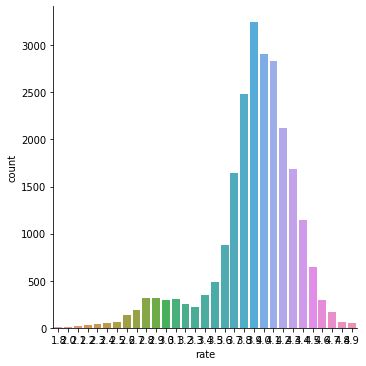

In [28]:
#visualizing the count of resturant and rating
sns.catplot(x = 'rate', data = zomato , kind ='count')

###tocheck

In [29]:
#count of resturants per area
co_rest=zomato.groupby(['Area'])[['name']].nunique()
z1= co_rest.reset_index().sort_values(by=['name'],ascending=False).head(n=10)
z1

,Area,name
77,ball,481
73,Whitefield,319
25,Indiranagar,306
22,HSR,272
43,Marathahalli,223
0,BTM,191
27,JP Nagar,188
29,Jayanagar,185
19,Electronic City,156
3,Bannerghatta Road,129


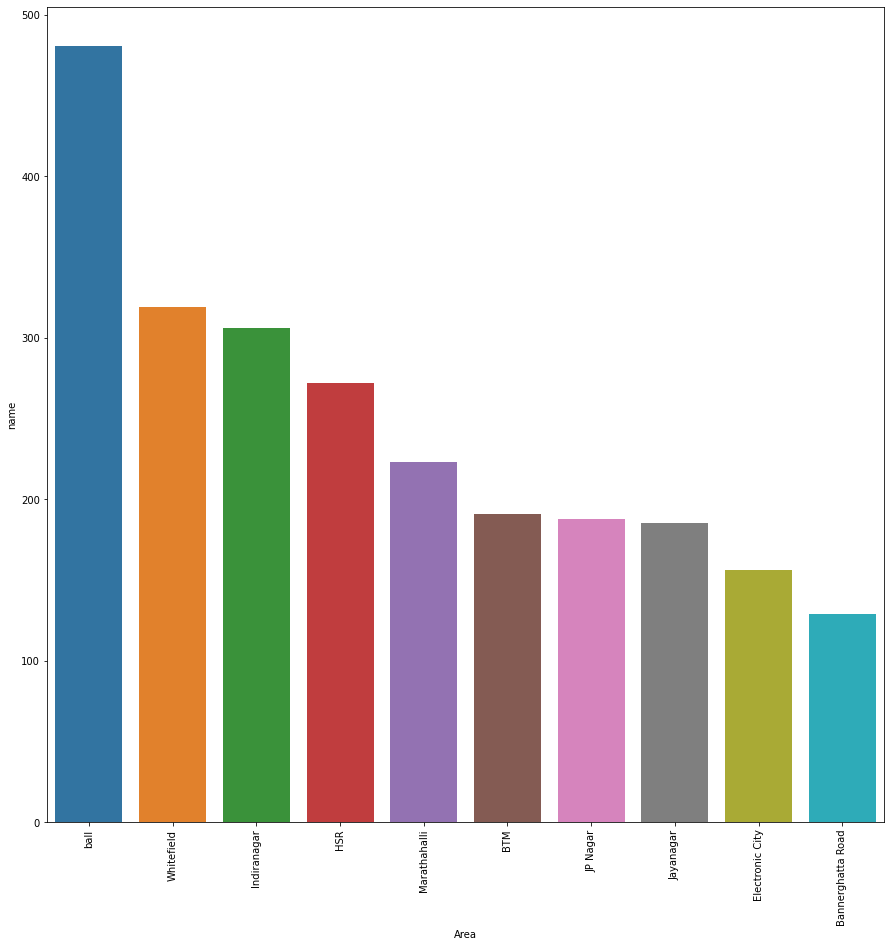

In [30]:
ax = sns.barplot(x="Area", y="name", data=z1)
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

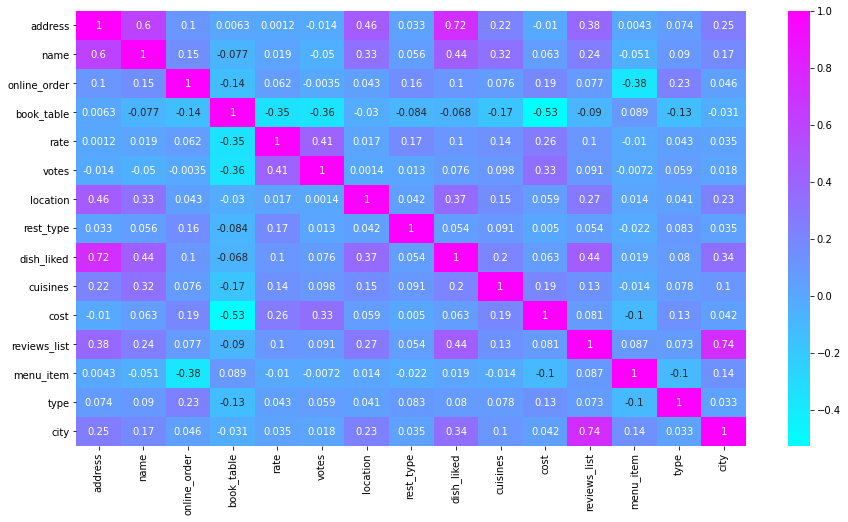

In [31]:
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap = 'cool')
zomato_en.columns

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Online/Offline')

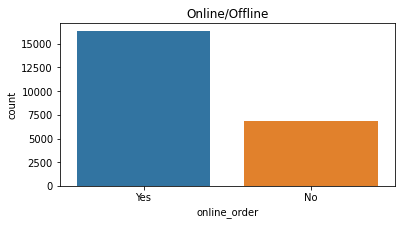

In [32]:
#Restaurants delivering Online or not
sns.countplot(zomato['online_order'])
fig = plt.gcf()
fig.set_size_inches(6,3)
plt.title('Online/Offline')

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'table booking')

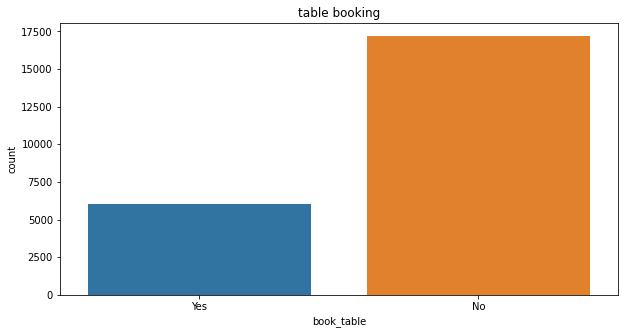

In [33]:
sns.countplot(zomato['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('table booking')

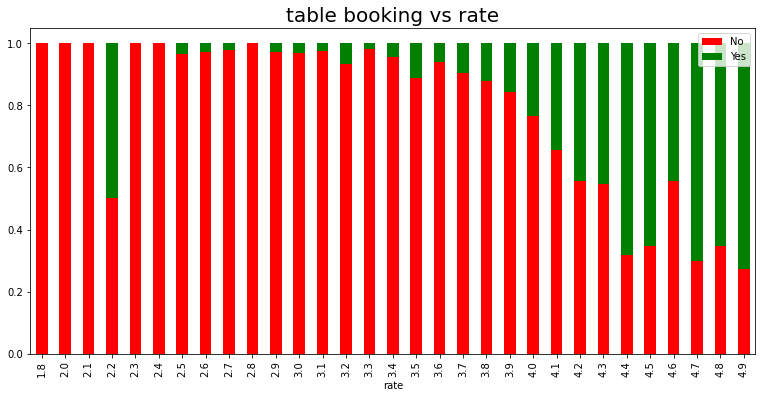

In [34]:
plt.rcParams['figure.figsize'] = (13, 6)
Y = pd.crosstab(zomato['rate'], zomato['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','green'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Location')

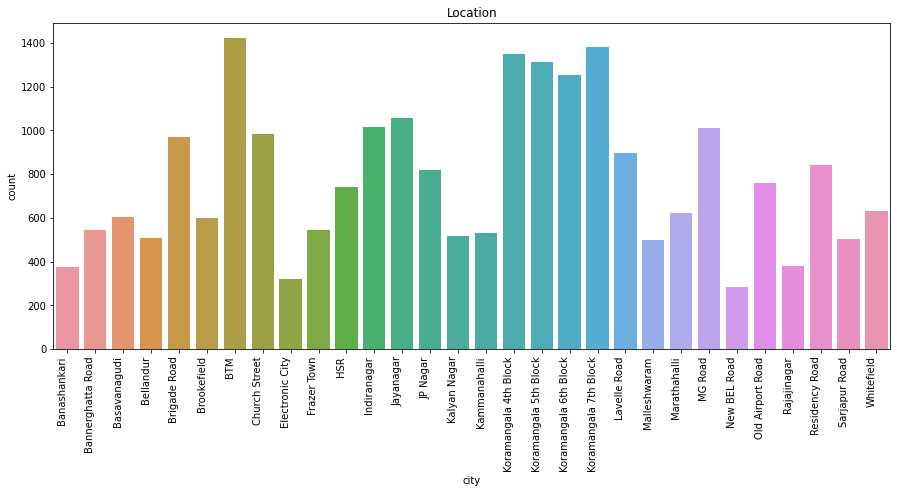

In [35]:
# Location
sns.countplot(zomato['city'])
sns.countplot(zomato['city']).set_xticklabels(sns.countplot(zomato['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.title('Location')

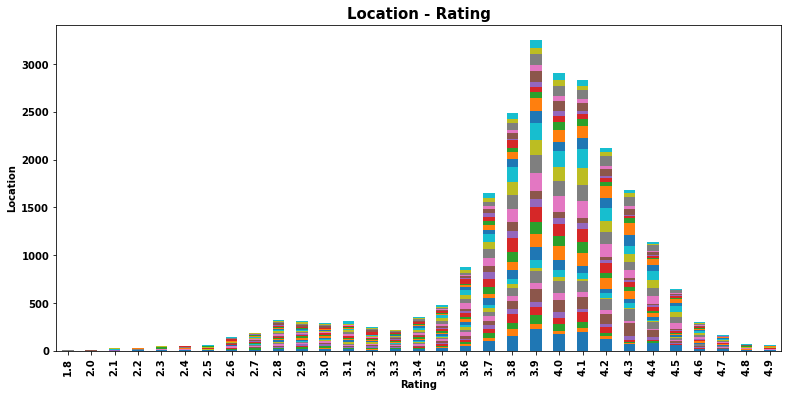

In [36]:
#Location and Rating
loc_plt=pd.crosstab(zomato['rate'],zomato['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\91959\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Type of Service')

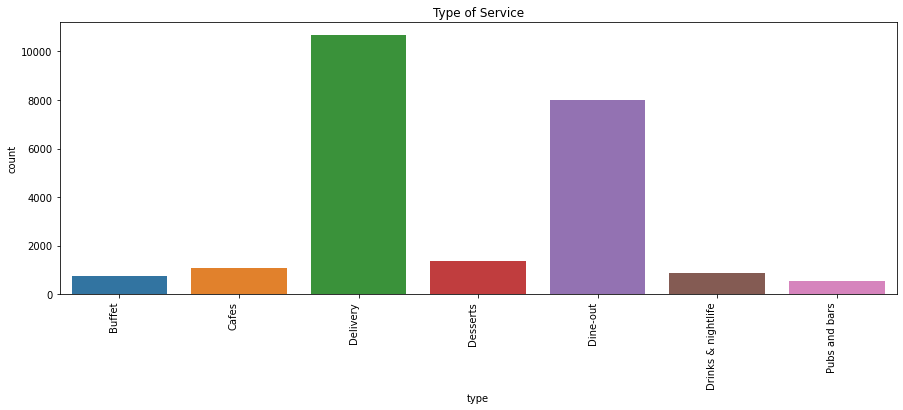

In [37]:
#Types of Services
sns.countplot(zomato['type'])
sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title('Type of Service')

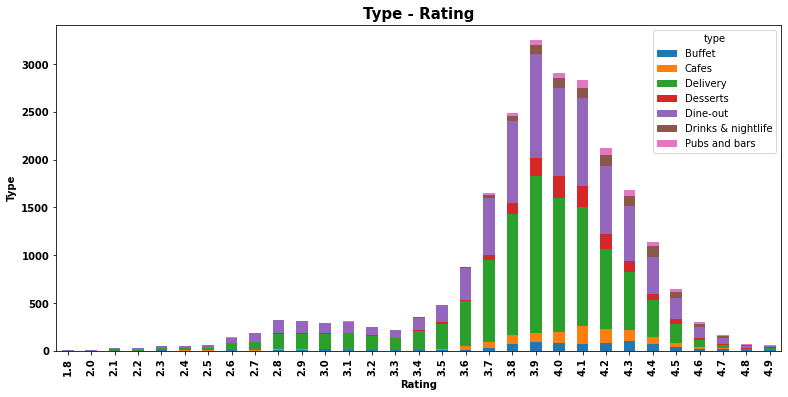

In [38]:
#Type and Rating
type_plt=pd.crosstab(zomato['rate'],zomato['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

# APRIORI

In [39]:
zomatoCopy['row_num'] = np.arange(len(zomatoCopy))
zomatoCopy.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,...,menu_item,type,city,Dish-1,Dish-2,Dish-3,Cuisine-1,Cuisine-2,Cuisine-3,row_num
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",...,[],Buffet,Banashankari,Pasta,Lunch Buffet,Masala Papad,North Indian,Mughlai,Chinese,0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",...,[],Buffet,Banashankari,Momos,Lunch Buffet,Chocolate Nirvana,Chinese,North Indian,Thai,1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",...,[],Buffet,Banashankari,Churros,Cannelloni,Minestrone Soup,Cafe,Mexican,Italian,2
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",...,[],Buffet,Banashankari,Masala Dosa,None,None,South Indian,North Indian,None,3
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",...,[],Buffet,Banashankari,Panipuri,Gol Gappe,None,North Indian,Rajasthani,None,4


In [40]:
chk = zomatoCopy.groupby(['location'])[['row_num']].nunique()
chk = chk.sort_values(by=['row_num'])
chk

,row_num
location,
KR Puram,1
Kanakapura Road,2
Yelahanka,2
West Bangalore,2
Magadi Road,2
...,...
Jayanagar,1060
HSR,1170
Indiranagar,1355


In [83]:
s = ['Koramangala 5th Block','BTM','Indiranagar','HSR','Jayanagar','Whitefield']

In [84]:
total = zomatoCopy[zomatoCopy['location'].isin(s)]
total.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,...,menu_item,type,city,Dish-1,Dish-2,Dish-3,Cuisine-1,Cuisine-2,Cuisine-3,row_num
28,"4, Opposite NMKRV College, 21st C Cross Road, ...",Empire Restaurant,Yes,No,4.4,4884,Jayanagar,Casual Dining,"Chicken Tikka Masala, Mutton Keema Dosa, Mutto...","North Indian, Mughlai, South Indian, Chinese",...,[],Delivery,Banashankari,Chicken Tikka Masala,Mutton Keema Dosa,Mutton Biryani,North Indian,Mughlai,South Indian,28
39,"178, Next To Old KEB Office, 8th F Main Road, ...",Biryanis And More,Yes,No,4.0,618,Jayanagar,Casual Dining,"Prawn Biryani, Dragon Chicken, Chicken Boneles...","Biryani, North Indian, Chinese, Andhra, South ...",...,[],Delivery,Banashankari,Prawn Biryani,Dragon Chicken,Chicken Boneless Biryani,Biryani,North Indian,Chinese,39
53,"52, 1st Floor, 33rd Cross, 4th Block, Jayanaga...",Meghana Foods,Yes,No,4.4,4401,Jayanagar,Casual Dining,"Chicken Boneless Biryani, Hyderabadi Biryani, ...","Biryani, North Indian, Chinese",...,[],Delivery,Banashankari,Chicken Boneless Biryani,Hyderabadi Biryani,Paneer Biryani,Biryani,North Indian,Chinese,53
64,"155, 43rd Cross Road, 8th Block, Jayanagar, Ba...",Sri Udupi Food Hub,Yes,Yes,4.1,175,Jayanagar,Casual Dining,"Filter Coffee, Masala Dosa, Idli, Vada","South Indian, North Indian, Chinese, Beverages",...,"['Idili [2 pieces] with Vada [1 Piece]', 'Poor...",Delivery,Banashankari,Filter Coffee,Masala Dosa,Idli,South Indian,North Indian,Chinese,64
69,"1A/29 , Shop 2 , 27th Cross, Jayanagar, Bangalore",Roll Over,Yes,No,4.1,438,Jayanagar,Dessert Parlor,"Rolls, Ice Cream Roll, Paan Ice Cream, Coffee,...","Desserts, Ice Cream, Beverages, Fast Food, San...",...,[],Delivery,Banashankari,Rolls,Ice Cream Roll,Paan Ice Cream,Desserts,Ice Cream,Beverages,69


In [85]:
basket = total.groupby(['row_num','cuisines'])['cost'].sum().unstack().reset_index().fillna(0).set_index('row_num')

In [44]:
basket_koramagala = (total[total['location'] =="Koramangala 5th Block"]
          .groupby(['row_num', 'cuisines'])['cost']
          .sum().unstack().reset_index().fillna(0)
          .set_index('row_num'))

In [45]:
basket_BTM = (total[total['location'] =="BTM"]
          .groupby(['row_num', 'cuisines'])['cost']
          .sum().unstack().reset_index().fillna(0)
          .set_index('row_num'))

In [46]:
basket_Indiranagar = (total[total['location'] =="Indiranagar"]
          .groupby(['row_num', 'cuisines'])['cost']
          .sum().unstack().reset_index().fillna(0)
          .set_index('row_num'))

In [47]:
basket_HSR = (total[total['location'] =="HSR"]
          .groupby(['row_num', 'cuisines'])['cost']
          .sum().unstack().reset_index().fillna(0)
          .set_index('row_num'))

In [48]:
basket_Jayanagar = (total[total['location'] =="Jayanagar"]
          .groupby(['row_num', 'cuisines'])['cost']
          .sum().unstack().reset_index().fillna(0)
          .set_index('row_num'))

In [49]:
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1


In [50]:
basket_encoded1 = basket_koramagala.applymap(hot_encode)
basket_koramagala = basket_encoded1

basket_encoded2 = basket_BTM.applymap(hot_encode)
basket_BTM = basket_encoded2

basket_encoded3 = basket_Indiranagar.applymap(hot_encode)
basket_Indiranagar=basket_encoded3

In [51]:
#Kormangala
frequent_itemsets_koramagala = apriori(basket_koramagala, min_support=0.003, use_colnames=True)
rules_koramagala = association_rules(frequent_itemsets_koramagala, metric="lift", min_threshold=1)

In [52]:
frequent_itemsets_koramagala

,support,itemsets
0,0.003378,"(Andhra, Biryani, Chinese)"
1,0.005631,"(Andhra, Biryani, North Indian, Chinese)"
2,0.005631,"(Andhra, North Indian, Biryani)"
3,0.003941,"(Andhra, North Indian, Chinese)"
4,0.003378,(Arabian)
...,...,...
121,0.005068,"(South Indian, North Indian, Chinese, Street F..."
122,0.006194,"(Tibetan, Chinese, Continental, Momos)"
123,0.006194,"(Tibetan, Nepalese, Momos)"
124,0.006194,"(Turkish, Desserts)"


In [53]:
#BTM
frequent_itemsets_BTM = apriori(basket_BTM, min_support=0.003, use_colnames=True)
rules_BTM = association_rules(frequent_itemsets_BTM, metric="lift", min_threshold=1)

In [80]:
frequent_itemsets_BTM

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [55]:
#basket_Indiranagar
frequent_itemsets_Indiranagar = apriori(basket_Indiranagar, min_support=0.003, use_colnames=True)
rules_BTM = association_rules(frequent_itemsets_Indiranagar, metric="lift", min_threshold=1)

# BOT CODE

In [111]:
def cusineRec():
    print('Let me know your prefered Area')
    area = input()
    basket_area = (total[total['location'] ==str(area)]
              .groupby(['row_num', 'cuisines'])['cost']
              .sum().unstack().reset_index().fillna(0)
              .set_index('row_num'))

    basket_encoded1 = basket_area.applymap(hot_encode)
    basket_area = basket_encoded1

    frequent_itemsets_area = apriori(basket_area, min_support=0.003, use_colnames=True)

    frequent_itemsets_area = frequent_itemsets_area.sort_values('support',ascending=False)
    name = frequent_itemsets_area['itemsets'].values[0]
    value, = name

    print('The Famous cusine in '+str(area) + ' is ' + str(value))

In [109]:
def restaurantBasedOnLocation(a,b):
    subdf = zomato[(zomato['Area'].astype(str).str.contains(a,case=False))&(zomato['rest_type'].astype(str).str.contains(b,case=False))]
    subdf = subdf.sort_values('rate',ascending=False)
    subdf = subdf.drop_duplicates(subset=['name'], keep='first').head(n=3)
    return subdf['name'].values

In [75]:
def rating(a):
    subdf = zomato[(zomato['name'].astype(str).str.contains(a,case=False))]
    subdf = subdf.sort_values('rate',ascending=False)
    subdf = subdf.drop_duplicates(subset=['name'], keep='first').head(n=3)
    val = subdf['rate'].values[0]
    name = subdf['name'].values[0]
    print('Rating of ' + str(name)+ ' is ' + str(val))

In [113]:
def recem():
    print('Let me know your prefered Area')
    area = input()
    print('')
    print('Select the restaurant type')
    DineType = input() 
    area= str(area)
    DineType = str(DineType)
    li1 = restaurantBasedOnLocation(area,DineType)
    print('.................................')
    print('.................................')
    print('List of the top Three recommended Restaurants')
    print('1 ' +li1[0])
    print('2 ' +li1[1])    
    print('3 ' +li1[2])

def greet(bot_name):
    print("Hello! My name is {0}.".format(bot_name))
    print("I am here to help you with your order.")
    print('')


def remind_name():
    print('Please, remind me your name.')
    name = input()
    print("What a great name you have, {0}!".format(name))
    print('')


def end():
    print('.................................')
    print('Thank you! Have a great Day!')   
    print('.................................')

def restRec():
    print('Select the choice')
    print('1. Restaurant Recomendation')
    print('2. Restaurant rating')
    print('3. Cusines Recomendation for the area')
    
    choice = input()
    
    if(int(choice) == 1):
        recem()
    elif(int(choice) == 2):
        print('Enter name of the restaurant')
        resta = input()
        rating(str(resta))
    elif(int(choice) == 3):      
        cusineRec()
    else:
        print('Invalid option')
        print('Please try Again')
        restRec()

    
greet('Akshaya Patra')  # change it as you need
remind_name()
restRec()
end()



Hello! My name is Akshaya Patra.
I am here to help you with your order.

Please, remind me your name.
ss
What a great name you have, ss!

Select the choice
1. Restaurant Recomendation
2. Restaurant rating
3. Cusines Recomendation for the area
3
Let me know your prefered Area
HSR
The Famous cusine in HSR is North Indian
.................................
Thank you! Have a great Day!
.................................
